In [1]:
import pandas as pd
import numpy as np
import csv
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords   
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.utils import resample

In [2]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [3]:
data = []
error_data = []
with open('fraud_call.tsv', 'r') as f:
    reader = csv.reader(f, delimiter='\t')
    for row in reader:
        if len(row) == 2:  # Check if the row has 2 fields
            data.append(row)
        else:
            error_data.append(row)


In [4]:
error_data

[['normal',
  "When're you guys getting back? G said you were thinking about not staying for mcr.normla",
  ''],
 [],
 [],
 [],
 [],
 []]

In [5]:
data.append(error_data[0][:2])

In [6]:
len(data)

5925

In [7]:
data

[['fraud',
  'Todays Vodafone numbers ending with 4882 are selected to a receive a Â£350 award. If your number matches call 09064019014 to receive your Â£350 award.'],
 ['normal', "Please don't say like that. Hi hi hi"],
 ['fraud',
  'hello, i m bank manager of SBI, ur debit card is about to expire would u want to issue new  card.'],
 ['normal', 'Thank you!'],
 ['normal', 'Oh that was a forwarded message. I thought you send that to me.'],
 ['normal', 'Got it. Seventeen pounds for seven hundred ml â€“ hope ok.'],
 ['normal', 'Me and him so funny...'],
 ['normal',
  'Sweetheart, hope you are not having that kind of day! Have one with loads of reasons to smile. Biola'],
 ['normal', 'When you login date time... Dad fetching you home now?'],
 ['normal', 'What will we do in the shower, baby?'],
 ['normal', 'I had askd u a question some hours before. Its answer'],
 ['normal',
  "Well i am definitely need to restock before thanksgiving, I'll let you know when I'm out"],
 ['normal',
  "said kis

In [8]:
stop_words = set(stopwords.words('english'))
unique_words = set()
row_word_counts = []

In [9]:
for _, text in data:
    words = word_tokenize(text.lower())
    filtered_words = [word for word in words if word.isalpha() and word not in stop_words]
    unique_words.update(filtered_words)
    word_counts = {word: filtered_words.count(word) for word in unique_words}
    row_word_counts.append(word_counts)

In [10]:
len(unique_words)

7428

In [11]:
len(row_word_counts)

5925

In [12]:
new_data = []
for i, _ in data:
    new_data.append(i)

In [13]:
df_rows = []

# Step 2: Iterate over data and row_words_count
for i, output in enumerate(new_data):
    word_count = row_word_counts[i]  # Get the word count dictionary for this row
    row = {"output": output}  # Start with the output column (fraud/legitimate)
    
    # Step 3: Add word counts for each unique word
    for word in unique_words:
        row[word] = word_count.get(word, 0)  # Get word count or 0 if word is not found
    
    df_rows.append(row)

In [14]:
df_rows[0]

{'output': 'fraud',
 'mountains': 0,
 'african': 0,
 'xxxxxx': 0,
 'uncles': 0,
 'rofl': 0,
 'inr': 0,
 'st': 0,
 'beehoon': 0,
 'heaven': 0,
 'picture': 0,
 'ugh': 0,
 'remembered': 0,
 'calculated': 0,
 'brown': 0,
 'original': 0,
 'texas': 0,
 'intha': 0,
 'staff': 0,
 'chosen': 0,
 'combine': 0,
 'str': 0,
 'unattempted': 0,
 'cbe': 0,
 'action': 0,
 'spam': 0,
 'mt': 0,
 'challenging': 0,
 'absence': 0,
 'dogging': 0,
 'nav': 0,
 'plane': 0,
 'uin': 0,
 'wednesday': 0,
 'psychiatrist': 0,
 'explain': 0,
 'creepy': 0,
 'products': 0,
 'changed': 0,
 'woot': 0,
 'bedroom': 0,
 'goin': 0,
 'portal': 0,
 'farting': 0,
 'girl': 0,
 'vague': 0,
 'john': 0,
 'happens': 0,
 'vital': 0,
 'kay': 0,
 'bathe': 0,
 'national': 0,
 'reputation': 0,
 'toll': 0,
 'granite': 0,
 'scotch': 0,
 'mids': 0,
 'current': 0,
 'drive': 0,
 'tookplace': 0,
 'cutest': 0,
 'error': 0,
 'various': 0,
 'lecture': 0,
 'welcomes': 0,
 'pushes': 0,
 'brats': 0,
 'yoyyooo': 0,
 'flung': 0,
 'dasara': 0,
 'happy': 

In [15]:
words_with_positive_count = [word for word, value in df_rows[0].items() if isinstance(value, int) and value > 0]

print(f"Words with count greater than 0: {words_with_positive_count}")


Words with count greater than 0: ['call', 'receive', 'award', 'number', 'selected', 'matches', 'numbers', 'vodafone', 'todays', 'ending']


In [16]:
df = pd.DataFrame(df_rows)
df.head()

output  mountains  african  xxxxxx  uncles  rofl  inr  st  beehoon  heaven  \
0   fraud          0        0       0       0     0    0   0        0       0   
1  normal          0        0       0       0     0    0   0        0       0   
2   fraud          0        0       0       0     0    0   0        0       0   
3  normal          0        0       0       0     0    0   0        0       0   
4  normal          0        0       0       0     0    0   0        0       0   

   picture  ugh  remembered  calculated  brown  original  texas  intha  staff  \
0        0    0           0           0      0         0      0      0      0   
1        0    0           0           0      0         0      0      0      0   
2        0    0           0           0      0         0      0      0      0   
3        0    0           0           0      0         0      0      0      0   
4        0    0           0           0      0         0      0      0      0   

   chosen  combine  str  unattempted  cbe  action  spam  mt  challenging  \
0       0        0    0            0    0       0     0   0            0   
1       0        0    0            0    0       0     0   0            0   
2       0        0    0            0    0       0     0   0            0   
3       0        0    0            0    0       0     0   0            0   
4       0        0    0            0    0       0     0   0            0   

   absence  dogging  nav  plane  uin  wednesday  psychiatrist  explain  \
0        0        0    0      0    0          0             0        0   
1        0        0    0      0    0          0             0        0   
2        0        0    0      0    0          0             0        0   
3        0        0    0      0    0          0             0        0   
4        0        0    0      0    0          0             0        0   

   creepy  products  changed  woot  bedroom  goin  portal  farting  girl  \
0       0         0        0     0        0     0       0        0     0   
1       0         0        0     0        0     0       0        0     0   
2       0         0        0     0        0     0       0        0     0   
3       0         0        0     0        0     0       0        0     0   
4       0         0        0     0        0     0       0        0     0   

   vague  john  happens  vital  kay  bathe  national  reputation  toll  \
0      0     0        0      0    0      0         0           0     0   
1      0     0        0      0    0      0         0           0     0   
2      0     0        0      0    0      0         0           0     0   
3      0     0        0      0    0      0         0           0     0   
4      0     0        0      0    0      0         0           0     0   

   granite  scotch  mids  current  drive  tookplace  cutest  error  various  \
0        0       0     0        0      0          0       0      0        0   
1        0       0     0        0      0          0       0      0        0   
2        0       0     0        0      0          0       0      0        0   
3        0       0     0        0      0          0       0      0        0   
4        0       0     0        0      0          0       0      0        0   

   lecture  welcomes  pushes  brats  yoyyooo  flung  dasara  happy  culture  \
0        0         0       0      0        0      0       0      0        0   
1        0         0       0      0        0      0       0      0        0   
2        0         0       0      0        0      0       0      0        0   
3        0         0       0      0        0      0       0      0        0   
4        0         0       0      0        0      0       0      0        0   

   making  moseley  smell  donno  changing  percentages  bw  forget  hiphop  \
0       0        0      0      0         0            0   0       0       0   
1       0        0      0      0         0            0   0       0       0   
2       0        0      0      0      

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5925 entries, 0 to 5924
Columns: 7429 entries, output to oranges
dtypes: int64(7428), object(1)
memory usage: 335.8+ MB


In [18]:
df.columns

Index(['output', 'mountains', 'african', 'xxxxxx', 'uncles', 'rofl', 'inr',
       'st', 'beehoon', 'heaven',
       ...
       'plumbing', 'frndshp', 'hanging', 'seldom', 'gei', 'took',
       'thandiyachu', 'luvd', 'cramps', 'oranges'],
      dtype='object', length=7429)

In [19]:
negative_data = df[df["output"] == 'normal']
positive_data = df[df["output"] == 'fraud'] 

In [20]:


positive_upsample = resample(
    positive_data,
    replace=True,
    n_samples=int(0.9 * len(negative_data)),
    random_state=42,
)

In [21]:
new_df = negative_data
new_df = pd.concat([new_df, positive_upsample], ignore_index=True)

In [22]:
new_df.shape

(10045, 7429)

In [23]:
new_df = new_df.sample(frac=1)

In [24]:
X = df.drop(columns=['output'])
y = df['output']

In [25]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [26]:
acc_score = []
for i in range(1,16,2):
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    acc_score.append(accuracy_score(y_test, y_pred))

acc_score

[0.9550056242969629,
 0.9420697412823397,
 0.9313835770528683,
 0.9240719910011248,
 0.9184476940382452,
 0.9145106861642295,
 0.9111361079865017,
 0.907199100112486]

In [27]:
model = KNeighborsClassifier(n_neighbors=1)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
y_pred

array(['normal', 'normal', 'fraud', ..., 'normal', 'normal', 'normal'],
      dtype=object)

In [28]:
list(y_pred).count('fraud')

114

In [29]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       fraud       0.98      0.59      0.74       190
      normal       0.95      1.00      0.98      1588

    accuracy                           0.96      1778
   macro avg       0.97      0.79      0.86      1778
weighted avg       0.96      0.96      0.95      1778



In [30]:
print(confusion_matrix(y_test, y_pred))

[[ 112   78]
 [   2 1586]]


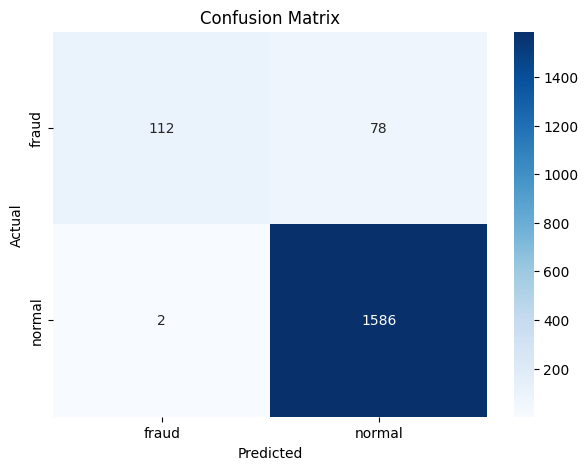

In [31]:
cm = confusion_matrix(y_test, y_pred)
labels = ['fraud', 'normal']
plt.figure(figsize=(7, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [33]:
112/(78+112)

0.5894736842105263

output  mountains  african  xxxxxx  uncles  rofl  inr  st  beehoon  heaven  \
0   fraud          0        0       0       0     0    0   0        0       0   
2   fraud          0        0       0       0     0    0   0        0       0   
19  fraud          0        0       0       0     0    0   0        0       0   
22  fraud          0        0       0       0     0    0   0        0       0   
23  fraud          0        0       0       0     0    0   0        0       0   

    picture  ugh  remembered  calculated  brown  original  texas  intha  \
0         0    0           0           0      0         0      0      0   
2         0    0           0           0      0         0      0      0   
19        0    0           0           0      0         0      0      0   
22        0    0           0           0      0         0      0      0   
23        0    0           0           0      0         0      0      0   

    staff  chosen  combine  str  unattempted  cbe  action  spam  mt  \
0       0       0        0    0            0    0       0     0   0   
2       0       0        0    0            0    0       0     0   0   
19      0       0        0    0            0    0       0     0   0   
22      0       0        0    0            0    0       0     0   0   
23      0       0        0    0            0    0       0     0   0   

    challenging  absence  dogging  nav  plane  uin  wednesday  psychiatrist  \
0             0        0        0    0      0    0          0             0   
2             0        0        0    0      0    0          0             0   
19            0        0        0    0      0    0          0             0   
22            0        0        0    0      0    0          0             0   
23            0        0        0    0      0    0          0             0   

    explain  creepy  products  changed  woot  bedroom  goin  portal  farting  \
0         0       0         0        0     0        0     0       0        0   
2         0       0         0        0     0        0     0       0        0   
19        0       0         0        0     0        0     0       0        0   
22        0       0         0        0     0        0     0       0        0   
23        0       0         0        0     0        0     0       0        0   

    girl  vague  john  happens  vital  kay  bathe  national  reputation  toll  \
0      0      0     0        0      0    0      0         0           0     0   
2      0      0     0        0      0    0      0         0           0     0   
19     0      0     0        0      0    0      0         0           0     0   
22     0      0     0        0      0    0      0         0           0     0   
23     0      0     0        0      0    0      0         0           0     0   

    granite  scotch  mids  current  drive  tookplace  cutest  error  various  \
0         0       0     0        0      0          0       0      0        0   
2         0       0     0        0      0          0       0      0        0   
19        0       0     0        0      0          0       0      0        0   
22        0       0     0        0      0          0       0      0        0   
23        0       0     0        0      0          0       0      0        0   

    lecture  welcomes  pushes  brats  yoyyooo  flung  dasara  happy  culture  \
0         0         0       0      0        0      0       0      0        0   
2         0         0       0      0        0      0       0      0        0   
19        0         0       0      0        0      0       0      0        0   
22        0         0       0      0        0      0       0      0        0   
23        0         0       0      0        0      0       0      0        0   

    making  moseley  smell  donno  changing  percentages  bw  forget  hiphop  \
0        0        0      0      0         0            0   0       0       0   
2        0        0      0      0         0            0   0       0     